In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import subfunc as sf
from tqdm import tqdm


In [2]:
# Models fit flag
is_fitted = True

In [3]:
DATA_PATH = 'data/'
X_train = pd.read_csv(f'{DATA_PATH}X_train.csv',sep='\t', index_col='index')
X_test = pd.read_csv(f'{DATA_PATH}X_test.csv', sep='\t', index_col='index')
y_train = pd.read_csv(f'{DATA_PATH}y_train.csv',sep='\t', index_col='index')
y_test = pd.read_csv(f'{DATA_PATH}y_test.csv',sep='\t', index_col='index')

In [4]:
target_columns = y_train.columns
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = \
    sf.select_target(X_train, X_test, y_train, y_test)

del X_train, X_test, y_train, y_test


In [5]:
np.random.seed(42)
models = {}

if not is_fitted:
    for target in tqdm(target_columns):
        best_score = 0
        best_model = None

        for n_estimators in np.arange(200, 350, 50):
            for lr in np.arange(0.001, 0.1, 0.005):
                current_model  = GradientBoostingRegressor(
                    n_estimators=n_estimators,
                    learning_rate=lr)
                current_model.fit(X_train_dataset[target], y_train_dataset[target])
                current_score = r2_score(y_test_dataset[target], current_model.predict(X_test_dataset[target]))

                if current_score > best_score:
                    best_score = current_score
                    best_model = current_model
                    print(f'{target} : {best_score}')

        models[target] = best_model
else:
    models = sf.models_load()


c:\program files\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\program files\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\program files\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
predict_data = pd.DataFrame(index=y_test_dataset[target_columns[0]].index,
                            columns=target_columns )
for key in models.keys():
    predict_data[key] = models[key].predict(X_test_dataset[key])

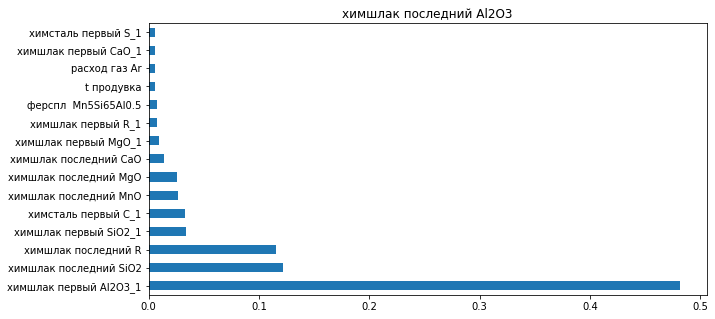

In [7]:
sf.plot_feature_importance(models[target_columns[0]],
                           X_train_dataset[target_columns[0]],
                           target_columns[0])

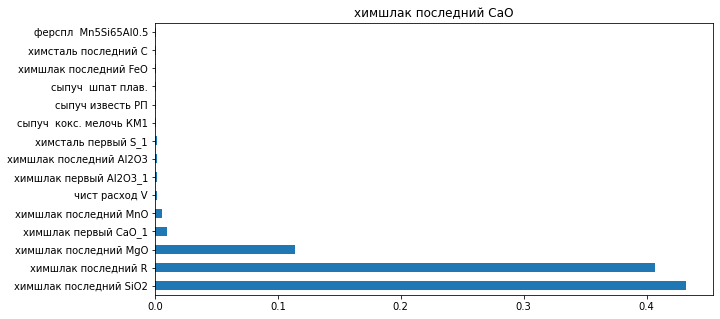

In [8]:
sf.plot_feature_importance(models[target_columns[1]],
                           X_train_dataset[target_columns[1]],
                           target_columns[1])

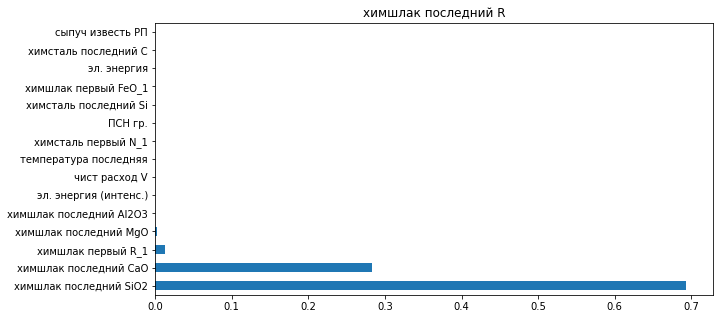

In [9]:
sf.plot_feature_importance(models[target_columns[2]],
                           X_train_dataset[target_columns[2]],
                           target_columns[2])

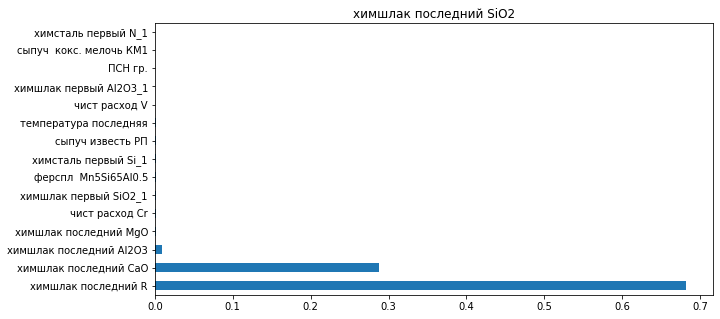

In [10]:
sf.plot_feature_importance(models[target_columns[3]],
                           X_train_dataset[target_columns[3]],
                           target_columns[3])

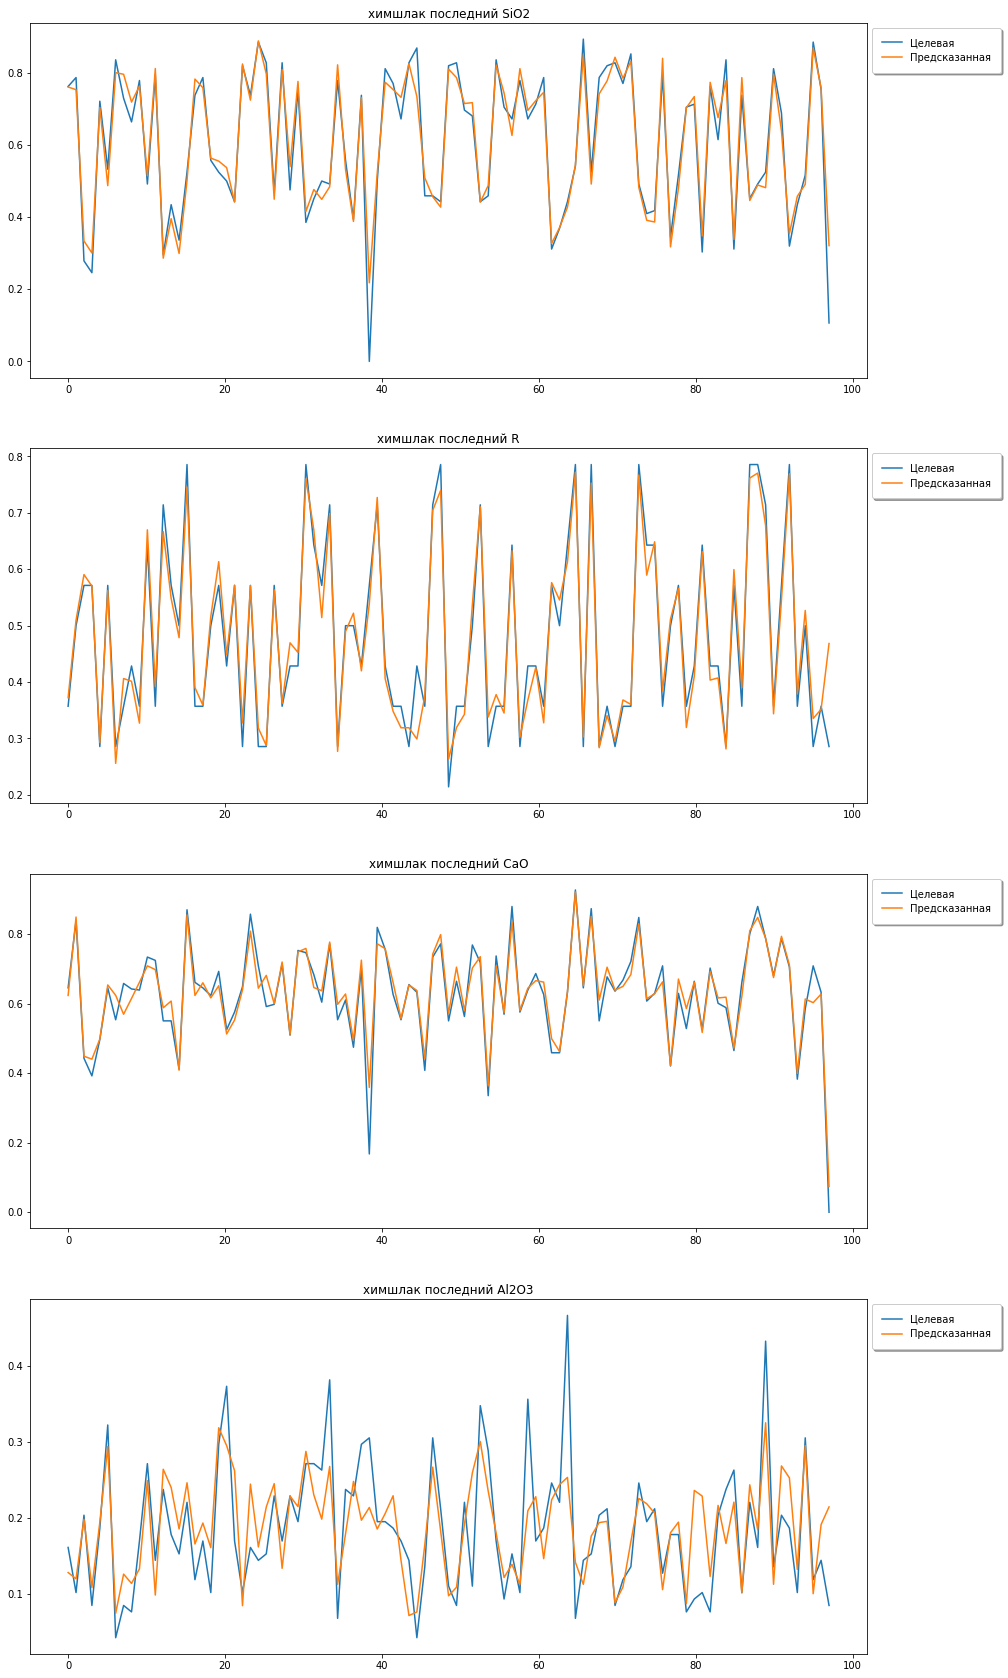

In [11]:
sf.show_result(predict_data, y_test_dataset, path='source/prediction_result.png')